In [36]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
# LOAD DATASET
data=pd.read_csv("D:\customer test csv\Test.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [38]:
# IDENTIFY CATEGORIAL COLUMNS
categorical_cols=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

In [39]:
# APPLY ONE HOT ENCODING
data=pd.get_dummies(data,columns=categorical_cols,drop_first=True)

In [40]:
# FILL MISSING VALUES IN NUMERICALCOLUMNS WITH MEDIAN
data.fillna(data.median(numeric_only=True),inplace=True)

In [41]:
# APPLY STANDARD SCALER
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [42]:
# CONVERT SCALED DATA BACK TO DATAFRAME FOR BETTER READABILITY
scaled_df=pd.DataFrame(scaled_data,columns=data.columns)
scaled_df.head()

,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.697994,-0.450948,-0.748105,-1.172097,-1.087983,0.853399,0.799891,-0.31854,3.182979,-0.359731,...,-0.303074,-0.210042,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
1,-1.696084,-0.391999,1.752242,0.792450,0.919132,0.853399,0.799891,-0.31854,-0.314171,-0.359731,...,-0.303074,-0.210042,-0.415024,-1.264285,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
2,-1.695320,1.494372,-0.748105,-1.172097,-1.087983,0.853399,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.303074,-0.210042,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
3,-1.693792,0.904881,2.689872,-0.517248,0.919132,0.853399,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.303074,-0.210042,2.409502,-1.264285,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
4,-1.693410,-1.453083,-0.435562,0.792450,-1.087983,-1.171785,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.303074,4.760952,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534


In [45]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [46]:
wcss

[60421.0,
 54398.2267319123,
 51134.39639523942,
 48129.48814830894,
 45482.27004619265,
 42807.9932377721,
 40183.68071165754,
 37779.01079608524,
 35190.789310418055,
 32646.63023803519]

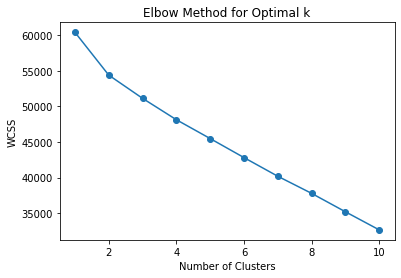

In [49]:
# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()